In [4]:

import pandas as pd
from vega import Vega,VegaLite



In [84]:
import altair as alt
import pandas as pd
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [55]:
df = pd.read_csv('base_biv.csv')

In [190]:
df.shape

(3420, 3)

In [157]:
df[(df.topic=='Россия')& (df.year_month<'2001-07')& (df.year_month>'2000-10')]

,year_month,topic,text
2066,2000-10-01,Россия,0.039747
2067,2000-11-01,Россия,0.035650
2068,2000-12-01,Россия,0.042405
2069,2001-01-01,Россия,0.023937
2070,2001-02-01,Россия,0.022115
2071,2001-03-01,Россия,0.021597
2072,2001-04-01,Россия,0.022454
2073,2001-05-01,Россия,0.031936
2074,2001-06-01,Россия,0.045977


In [5]:
false=False
true=True
null=None

In [69]:
col=list(df.topic.unique())

In [70]:
col

['Финансы',
 'Страны Балтии',
 'СНГ',
 'Авиация',
 'Россия-Белоруссия',
 'Выборы',
 'Правительство РФ',
 'Происшествия',
 'Военные операции',
 'Россия',
 'Украина',
 'Украина - ДНР/ЛНР',
 'Грузия',
 'Протесты на Украине',
 'Силовые структуры']

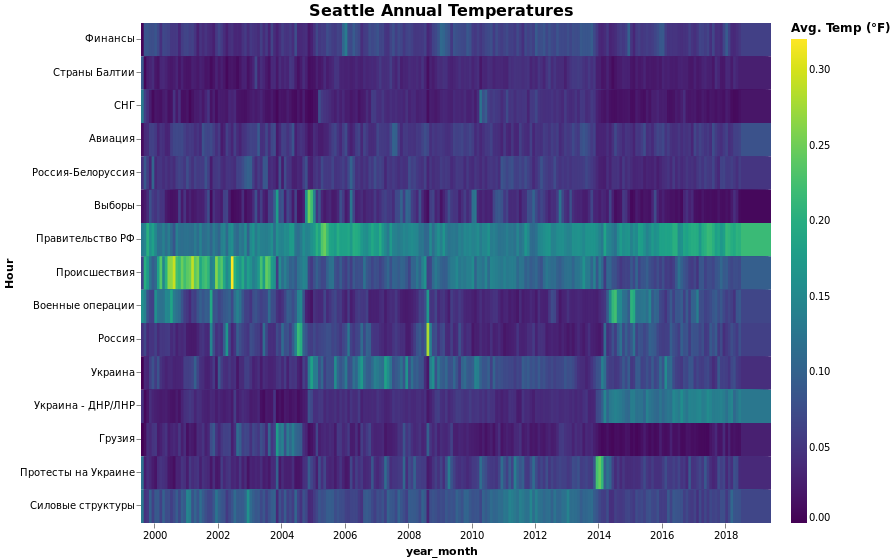

In [246]:
Vega({"$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 600,
  "height": 500,
  "padding": 1,

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "middle",
    "fontSize": 16,
    "frame": "group",
    "offset": 4
  },

  "signals": [
       { "name": "chartWidth", "value": 300 },
    {
      "name": "palette", "value": "Viridis",
      "bind": {
        "input": "select",
        "options": [
          "Viridis",
          "Magma",
          "Inferno",
          "Plasma",
          "Blues",
          "Greens",
          "Greys",
          "Purples",
       
        ]
      }
    },
    {
      "name": "reverse", "value": false, "bind": {"input": "checkbox"}
    },
      
    
      
    { "name": "year1", "value": 1999,
     
      "bind": {"input": "range", "min": 1999, "max": 2009, "step": 1} },
      
      { "name": "year2", "value": 2018,
     
      "bind": {"input": "range", "min": 2010, "max": 2018, "step": 1} },
      
      
  ],

      
  "data": [
      
      {
     "format": {"type": "csv", "parse": {"text": "number", "year_month": "date"}},
      "name": "database",
      "url": "base_biv.csv",},
       
      
      {
      "name": "popYear",
           "source": "database",
            "transform": [
               
          
                
       {"type": "filter", "expr": "datetime(year(datum.year_month)) <= year2 && datetime(year(datum.year_month)) >= year1"},
      ]
    },
      
    {
      "name": "temperature",
      "source": "popYear",
      
      
      "transform": [
                  
        { "type": "formula", "as": "year_month",
          "expr": "datetime(year(datum.year_month), month(datum.year_month), date(datum.year_month))"},
          
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "temperature", "field": "year_month"},
       "range":  "width"
      
    },
    {
      "name": "y",
      "type": "band",
      "domain": ['Финансы',
 'Страны Балтии',
 'СНГ',
 'Авиация',
 'Россия-Белоруссия',
 'Выборы',
 'Правительство РФ',
 'Происшествия',
 'Военные операции',
 'Россия',
 'Украина',
 'Украина - ДНР/ЛНР',
 'Грузия',
 'Протесты на Украине',
 'Силовые структуры'],
      "range": "height"
    },
    {
      "name": "color",
      "type": "sequential",
      "range": {"scheme": {"signal": "palette"}},
      "domain": {"data": "temperature", "field": "text"},
      "reverse": {"signal": "reverse"},
    
     
    }
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false, "title": "year_month", },
    {
      "orient": "left", "scale": "y", "domain": false, "title": "Hour",
      
    }
  ],

  "legends": [
    {
      "fill": "color",
      "type": "gradient",
      "title": "Avg. Temp (°F)",
      "titleFontSize": 12,
      "titlePadding": 4,
      "gradientLength": {"signal": "height - 16"},
          "offset": 50,
        
        
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "temperature"},
        
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 5},
          "height": {"scale": "y", "band": 1},
            "range": "width"
          
        },
        "update": {
           
          "fill": {"scale": "color",  "field": "text"},
            "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 30},
          "height": {"scale": "y", "band": 1},
        }
      }
    }
  ]
}
     
)


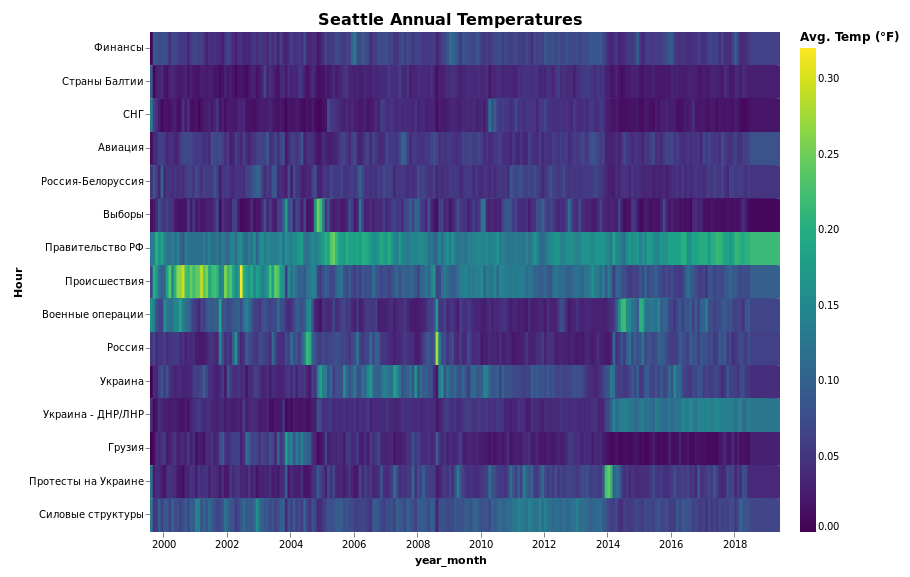

In [260]:
Vega({"$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 600,
  "height": 500,
  "padding": 10,

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "middle",
    "fontSize": 16,
    "frame": "group",
    "offset": 4
  },

  "signals": [
        
       { "name": "chartWidth", "padding": 10, },
    {
      "name": "palette", "value": "Viridis",
      "bind": {
        "input": "select",
        "options": [
          "Viridis",
          "Magma",
          "Inferno",
          "Plasma",
          "Blues",
          "Greens",
          "Greys",
          "Purples",
       
        ]
      }
    },
    {
      "name": "reverse", "value": false, "bind": {"input": "checkbox"}
    },
      
  
      
    { "name": "year1", "value": 2018,
     
      "bind": {"input": "range", "min": 2000, "max": 2018, "step": 1} },
      
      
      
  ],

      
  "data": [
      
      {
     "format": {"type": "csv", "parse": {"text": "number", "year_month": "date"}},
      "name": "database",
      "url": "base_biv.csv",},
       
      
      {
      "name": "popYear",
           "source": "database",
            "transform": [
       {"type": "filter", "expr": "datetime(year(datum.year_month)) <= year1"},
      ]
    },
      
    {
      "name": "temperature",
      "source": "popYear",
      
      
      "transform": [
                  
        { "type": "formula", "as": "year_month",
          "expr": "datetime(year(datum.year_month), month(datum.year_month), date(datum.year_month))"},
          
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "temperature", "field": "year_month"},
       "range":  "width"
      
    },
    {
      "name": "y",
      "type": "band",
      "domain": ['Финансы',
 'Страны Балтии',
 'СНГ',
 'Авиация',
 'Россия-Белоруссия',
 'Выборы',
 'Правительство РФ',
 'Происшествия',
 'Военные операции',
 'Россия',
 'Украина',
 'Украина - ДНР/ЛНР',
 'Грузия',
 'Протесты на Украине',
 'Силовые структуры'],
      "range": "height"
    },
    {
      "name": "color",
      "type": "sequential",
      "range": {"scheme": {"signal": "palette"}},
      "domain": {"data": "temperature", "field": "text"},
      "reverse": {"signal": "reverse"},
    
     
    }
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false, "title": "year_month", },
    {
      "orient": "left", "scale": "y", "domain": false, "title": "Hour",
      
    }
  ],

  "legends": [
    {
      "fill": "color",
      "type": "gradient",
      "title": "Avg. Temp (°F)",
      "titleFontSize": 12,
      "titlePadding": 4,
      "gradientLength": {"signal": "height - 16"},
          "offset": 50,
        
        
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "temperature"},
        
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 5},
          "height": {"scale": "y", "band": 1},
            "range": "width"
          
        },
        "update": {
           
          "fill": {"scale": "color",  "field": "text"},
            "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 30},
          "height": {"scale": "y", "band": 1},
        }
      }
    }
  ]
}
     
)


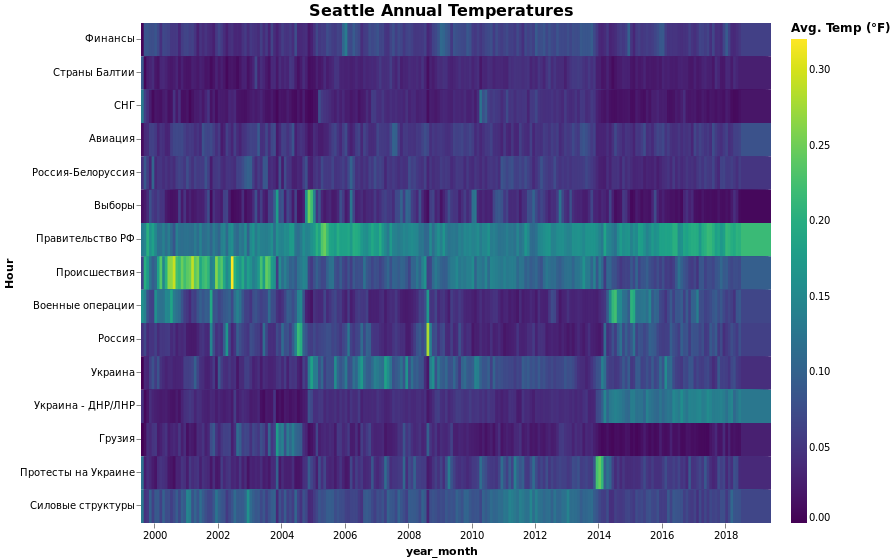

In [262]:
Vega({"$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 600,
  "height": 500,
  "padding": 1,

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "middle",
    "fontSize": 16,
    "frame": "group",
    "offset": 4
  },

  "signals": [
       { "name": "chartWidth", "value": 300 },
    {
      "name": "palette", "value": "Viridis",
      "bind": {
        "input": "select",
        "options": [
          "Viridis",
          "Magma",
          "Inferno",
          "Plasma",
          "Blues",
          "Greens",
          "Greys",
          "Purples",
       
        ]
      }
    },
    {
      "name": "reverse", "value": false, "bind": {"input": "checkbox"}
    },
      
    
      
    { "name": "year1", "value": 1999,
     
      "bind": {"input": "text",} },
      
      { "name": "year2", "value": 2018,
     
      "bind": {"input": "range", "min": 2010, "max": 2018, "step": 1} },
      
      
  ],

      
  "data": [
      
      {
     "format": {"type": "csv", "parse": {"text": "number", "year_month": "date"}},
      "name": "database",
      "url": "base_biv.csv",},
       
      
      {
      "name": "popYear",
           "source": "database",
            "transform": [
               
          
                
       {"type": "filter", "expr": "datetime(year(datum.year_month)) <= year2 && datetime(year(datum.year_month)) >= year1"},
      ]
    },
      
    {
      "name": "temperature",
      "source": "popYear",
      
      
      "transform": [
                  
        { "type": "formula", "as": "year_month",
          "expr": "datetime(year(datum.year_month), month(datum.year_month), date(datum.year_month))"},
          
      ]
    }
  ],

  "scales": [
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "temperature", "field": "year_month"},
       "range":  "width"
      
    },
    {
      "name": "y",
      "type": "band",
      "domain": ['Финансы',
 'Страны Балтии',
 'СНГ',
 'Авиация',
 'Россия-Белоруссия',
 'Выборы',
 'Правительство РФ',
 'Происшествия',
 'Военные операции',
 'Россия',
 'Украина',
 'Украина - ДНР/ЛНР',
 'Грузия',
 'Протесты на Украине',
 'Силовые структуры'],
      "range": "height"
    },
    {
      "name": "color",
      "type": "sequential",
      "range": {"scheme": {"signal": "palette"}},
      "domain": {"data": "temperature", "field": "text"},
      "reverse": {"signal": "reverse"},
    
     
    }
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false, "title": "year_month", },
    {
      "orient": "left", "scale": "y", "domain": false, "title": "Hour",
      
    }
  ],

  "legends": [
    {
      "fill": "color",
      "type": "gradient",
      "title": "Avg. Temp (°F)",
      "titleFontSize": 12,
      "titlePadding": 4,
      "gradientLength": {"signal": "height - 16"},
          "offset": 50,
        
        
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "temperature"},
        
      "encode": {
        "enter": {
          "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 5},
          "height": {"scale": "y", "band": 1},
            "range": "width"
          
        },
        "update": {
           
          "fill": {"scale": "color",  "field": "text"},
            "x": {"scale": "x", "field": "year_month"},
          "y": {"scale": "y", "field": "topic",},
          "width": {"value": 30},
          "height": {"scale": "y", "band": 1},
        }
      }
    }
  ]
}
     
)
